# A Systematic Approach to Visualizing Data
## Exploring a Telecom Customer Churn Dataset

TO DO
- Nothing so far.

Acknowlegements
- Thanks to David Wihl for fixing a plotting error.

## Introduction

In this notebook we'll explore a dataset containing information about a telecom company's customers. It comes from an [IBM Watson repository](https://www.ibm.com/communities/analytics/watson-analytics-blog/predictive-insights-in-the-telco-customer-churn-data-set/).

We've chosen this dataset because it is complicated enough to teach us things but not so complicated that it sidetracks us. It also gives us an opportunity to reason about a type of business problem that you will encounter (if you haven't already).

The dataset comes to us in the form of an Excel file. The name of the file is "WA_FN-UseC_-Telcom-Customer-Churn.xlsx". It's quite a cumbersome name, but we'll stick with it so we'll always know where it came from (you can quickly google the name in a pinch). And in general datasets come to us with various names and it's better to get to used to that right from the start.

We get data in two ways -- by creating it or by getting it from somewhere else. Once we get data, data scientists spend a surprising amount of time getting their heads wrapped around the data, cleaning it, and preparing it to be analyzed. We'll illustrate the main steps of this process here.

The objective of this notebook is to provide a template for data exploration -- the first and perhaps most critical step in any kind of data analysis project including machine learning.

There are two main reasons for visualizing data:
- To know what you have
- To get ideas for how to investigate the data

Missing values, data attributes with values that have different orders of magnitude, or skewed/unrepresentative data can all affect the quality of what you can infer from the data.

So how should data be visualized? There is no set recipe. Here are some guidelines.

## 1. Get the Data into Manipulable Form

First thing to do is to load up the data. This depends on the source of the input file -- it could come from a file on the local computer system or from a remote location like an Amazon AWS S3 bucket. For us, the file is already stored locally in the Data folder.

**NOTE:** We'll use some standard Python packages to load, manipulate, and visualize the data. These packages are tools that make our lives as data scientists a lot easier and less tedious. Packages are loaded using the "import" keyword or the "from A import B" or the "from A import B as C" locutions.

In [1]:
# We keep plotting simple and use common packages and defaults
import matplotlib.pyplot as plt
import seaborn as sns
# Set the aesthetics for Seaborn visuals
sns.set(context='notebook', 
        style='whitegrid', 
        palette='deep', 
        font='sans-serif', 
        font_scale=1.3, 
        color_codes=True, 
        rc=None)
%matplotlib inline

In [2]:
import os # to navigate the file system
import numpy as np # for number crunching
import pandas as pd # for data loading and manipulation

# OS-independent way to navigate the file system
# One directory up in relation to directory of this notebook
new_dir = os.path.normpath(os.getcwd() + os.sep + os.pardir)
# Where the file is
file_url = new_dir + os.sep + "Data" + os.sep + "WA_Fn-UseC_-Telco-Customer-Churn.xlsx"
file_url

'/Users/js/Dropbox/Repos/MLCourse/Data/WA_Fn-UseC_-Telco-Customer-Churn.xlsx'

In [3]:
# Read the excel sheet into a pandas dataframe
df_churn = pd.read_excel(file_url, sheetname=0)

The data is not in a form that can be manipulated for exploration and visualization.

## 2. Get a Handle on the Structure of the Data

### 2a. Number of Rows and Columns

In [4]:
# Look at the first few lines of the data -- scroll to the right to see more columns
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


How many rows (# of customers) and how many columns (# attritbutes of each customer) do we have?

In [5]:
# Number of rows and columns
num_rows, num_cols = df_churn.shape
num_rows, num_cols

(7043, 21)

This meams we have 7,043 customers with each customer tagged with 21 individual attributes such as customerID, gender, SeniorCitizen, etc. Let's get a complete list of the attributes.

### 2b. An Overview of Customer Features (or Attributes)

Here is a complete list of features (also known as attributes) that describe each of the 7,043 customers. We don't know yet if all customers are tagged with all 21 features -- we'll find out soon.

In [6]:
# Here is a list of the features with the first 5 values of each feature.
feature_list = list(df_churn)
# First 5 values of each feature in the list
first_5 = [list(df_churn[attribute][0:5]) for attribute in feature_list]
list(zip(feature_list, first_5))

[('customerID',
  ['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', '7795-CFOCW', '9237-HQITU']),
 ('gender', ['Female', 'Male', 'Male', 'Male', 'Female']),
 ('SeniorCitizen', [0, 0, 0, 0, 0]),
 ('Partner', ['Yes', 'No', 'No', 'No', 'No']),
 ('Dependents', ['No', 'No', 'No', 'No', 'No']),
 ('tenure', [1, 34, 2, 45, 2]),
 ('PhoneService', ['No', 'Yes', 'Yes', 'No', 'Yes']),
 ('MultipleLines', ['No phone service', 'No', 'No', 'No phone service', 'No']),
 ('InternetService', ['DSL', 'DSL', 'DSL', 'DSL', 'Fiber optic']),
 ('OnlineSecurity', ['No', 'Yes', 'Yes', 'Yes', 'No']),
 ('OnlineBackup', ['Yes', 'No', 'Yes', 'No', 'No']),
 ('DeviceProtection', ['No', 'Yes', 'No', 'Yes', 'No']),
 ('TechSupport', ['No', 'No', 'No', 'Yes', 'No']),
 ('StreamingTV', ['No', 'No', 'No', 'No', 'No']),
 ('StreamingMovies', ['No', 'No', 'No', 'No', 'No']),
 ('Contract',
  ['Month-to-month',
   'One year',
   'Month-to-month',
   'One year',
   'Month-to-month']),
 ('PaperlessBilling', ['Yes', 'No', 'Yes', 'No', 'Yes'

Some of the features have a discrete set of possible values (e.g., gender, PaymentMethod) while some others can take a range of values that need not be discrete (e.g., tenure, MonthlyCharges, TotalCharges).

### 2c. Categorical Feature and Their Possible Values
Some of the features in our dataset are *categorical* -- their values come from a small handful of discrete possibilities. Features like gender and payment method fit are categorical. Categorical features are also known as *discrete* features. Let's separate the discrete/categorical features from the rest -- we'll get a better grip if we look at them separately first.

In [7]:
# Identify all the features that are categorical

# Feature index numbers that are *not* categorical.
# Just count from the dataset starting at customerID's index = 0
not_categorical = [0,5,18,19] # CustomerID is not a feature but a unique identifier
# the categorical features are then the complement of the above list
categorical = list(set(range(df_churn.shape[1])) - set(not_categorical))
# get the unique values of the categorical features
[[feature_list[feature_index], list(df_churn.iloc[:, feature_index].unique())] \
    for feature_index in categorical]

[['gender', ['Female', 'Male']],
 ['SeniorCitizen', [0, 1]],
 ['Partner', ['Yes', 'No']],
 ['Dependents', ['No', 'Yes']],
 ['PhoneService', ['No', 'Yes']],
 ['MultipleLines', ['No phone service', 'No', 'Yes']],
 ['InternetService', ['DSL', 'Fiber optic', 'No']],
 ['OnlineSecurity', ['No', 'Yes', 'No internet service']],
 ['OnlineBackup', ['Yes', 'No', 'No internet service']],
 ['DeviceProtection', ['No', 'Yes', 'No internet service']],
 ['TechSupport', ['No', 'Yes', 'No internet service']],
 ['StreamingTV', ['No', 'Yes', 'No internet service']],
 ['StreamingMovies', ['No', 'Yes', 'No internet service']],
 ['Contract', ['Month-to-month', 'One year', 'Two year']],
 ['PaperlessBilling', ['Yes', 'No']],
 ['PaymentMethod',
  ['Electronic check',
   'Mailed check',
   'Bank transfer (automatic)',
   'Credit card (automatic)']],
 ['Churn', ['No', 'Yes']]]

### 2d. Numerical Features

Three of the features in this dataset are numerical:
- tenure
- MonthlyCharges
- TotalCharges 

In [8]:
# Put the numerical features into a list for subsquent use
numeric_features = [feature_list[n] for n in not_categorical][1:] # CustomerID is not a numeric feature
numeric_features

['tenure', 'MonthlyCharges', 'TotalCharges']

Notice that the SeniorCitizen attribute or feature is respresented numerically as a 1 or 0 -- but these numbers actually represent "Yes" or "No". In othere words, SeniorCitizen is a categorical attribute.

## 3. Visualize the Numerical Features

### SIDEBAR

Let's build ourselves a handy way to look at any set of attributes we choose. We can use this to isolate and explore various groups of attributes.

In [9]:
# View a selection of rows and columns in the df_churn dataframe
df_map = {'telco churn data': df_churn}
# We're calling our dataset 'telco churn data'
def table_view(data_frame_name, feature_list, start_row=3, end_row=5):
    '''
    Displays selected columns and rows of a data frame.
    '''
    # Verify the inputs are sane
    # get the size of the dataframe
    num_rows, num_cols = df_map[data_frame_name].shape
    if (start_row < 0) | (start_row > num_rows) :
        return print("Please use a valid Start Row number. It can be any number from 0 to {}".format(num_rows))
    if (end_row < 0) | (end_row > num_rows) | (end_row < start_row + 1):
        return print("Please use a valid End Row number. \
                     It can be any number from 0 to {} \
                     and must be greater than your start row number".format(num_rows)) 
    
    view = df_map[data_frame_name][feature_list].iloc[start_row:end_row]
    
    return view

In [10]:
# Using the table_view function defined above
# The name of our dataset (as defined above) is 'telco churn data'
# You can select any and any number of attributes in selected_columns
selected_columns = ['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']
table_view('telco churn data', selected_columns, 10, 14)

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
10,13,0,49.95,587.45
11,16,0,18.95,326.8
12,58,0,100.35,5681.1
13,49,0,103.70,5036.3


In [11]:
# We can  explore views in an interactive way
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import Button, HBox, VBox
from IPython.display import display
from IPython.display import clear_output

In [12]:
# Layout the interactive view widgets

# Data Frame Chooser Dropdown
dataFrame = widgets.Select(
             options=['telco churn data'],
             value='telco churn data',
             description='Data Source:',
             disabled=False
            )

# Start Row Text Field
startRow = widgets.IntText(
            value=7,
            description='Start Row:',
            disabled=False
           )

# End Row Text Field
endRow = widgets.IntText(
           value=12,
           description='End Row:',
           disabled=False
          )

# Attribute Selector (Multiple Select)
allFeatures = widgets.SelectMultiple(
               options = feature_list,
               rows = 20,
               description = 'Select Mulitple Features:',
               value = ['gender', 'SeniorCitizen', 'tenure', 'MonthlyCharges']
              )

# Button
button = widgets.Button(
          description='Show View',
          disabled=False,
          button_style='info', # 'success', 'info', 'warning', 'danger' or ''
          tooltip='Go!',
          icon=''
         )

def on_button_clicked(b):
    # Pass the values of the widgets to the table_view function
    clear_output()
    return print(table_view(dataFrame.value, list(allFeatures.value), startRow.value, endRow.value))
    
button.on_click(on_button_clicked)

### A Simple Display of Slices of the Dataset

In [13]:
# Display the elements
HBox([VBox([dataFrame, allFeatures, button]), VBox([startRow, endRow])])

    SeniorCitizen
7               0
8               0
9               0
10              0
11              0


### Summary Statistics

In [14]:
# Here are summary statistics - rough format but still useful
#df_churn['TotalCharges'].astype(float)
df_churn[['tenure', 'MonthlyCharges', 'TotalCharges']].describe(include='all')

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.0
unique,NaN,NaN,6531.0
top,NaN,NaN,20.2
freq,NaN,NaN,11.0
mean,32.371149,64.761692,NaN
std,24.559481,30.090047,NaN
min,0.000000,18.250000,NaN
25%,9.000000,35.500000,NaN
50%,29.000000,70.350000,NaN
75%,55.000000,89.850000,NaN


### Box Plots

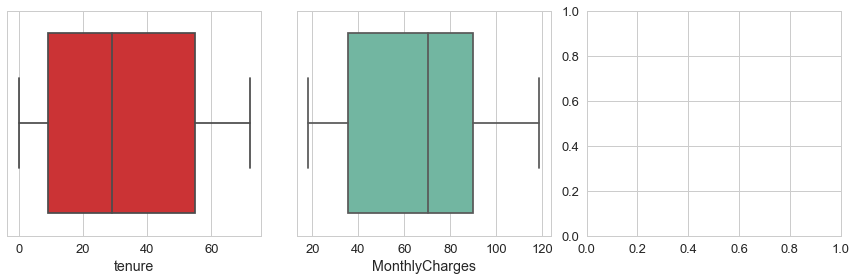

In [15]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
sns.boxplot(x=df_churn['tenure'], ax = ax1, palette='Set1') 
#ax1.set_title("Tenure")
sns.boxplot(x=df_churn['MonthlyCharges'], ax = ax2, palette='Set2')
#ax2.set_title("Monthly Charge")
# There are some monthly charges missing -- supress for now because we haven't yet handled missing values
#sns.boxplot(x=df_churn['TotalCharges'], ax = ax3, palette='Set3')
#ax3.set_title("Total Charge")
plt.tight_layout()

### Histogram

In [16]:
# Set up the plot
def plotFeatureHist(feature_name):
    fig, ax = plt.subplots(figsize=(12,7))
    sns.distplot(df_churn[feature_name], kde=False)
    return plt.show()

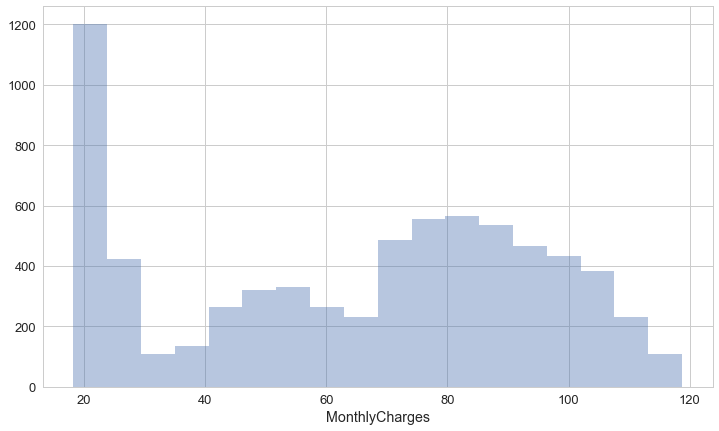

In [17]:
# How are the monthly charges distributed?
plotFeatureHist('MonthlyCharges')

## 4. Visualize Relationships Between Numerical Features

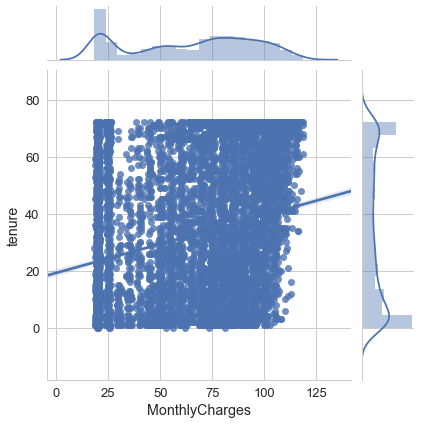

In [18]:
# How are tenure and monthly charges related?
g = sns.JointGrid(x="MonthlyCharges", y="tenure", data=df_churn)
g = g.plot(sns.regplot, sns.distplot)

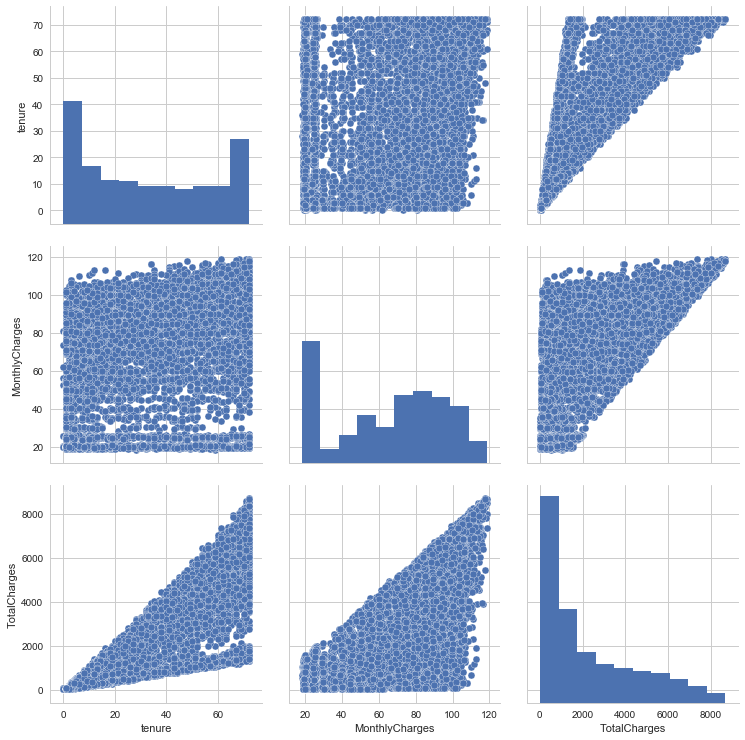

In [41]:
# Pairwise scatter plots of the numerical attributes
cols_numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df_churn[cols_numeric], size=3.5)

### How are the numerical attributes correlated?

In [20]:
# Calculate the correlation table
# Not sure why SeniorCitizen appears but TotalCharges doesn't appear.
corr = df_churn.corr()
corr

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


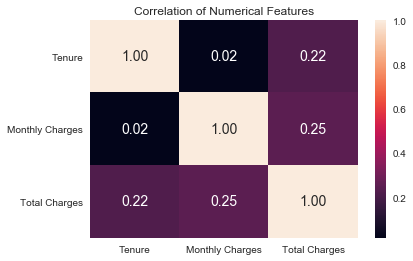

In [21]:
# Correlation Density Plot
feature_display_names = ['Tenure', 'Monthly Charges', 'Total Charges']
cm = df_churn.corr()
sns.set(font_scale=1)
# NOTE: fmt directive controls number of decimal points displayed
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=False,
                fmt='.2f',
                annot_kws={'size':14},
                yticklabels=feature_display_names,
                xticklabels=feature_display_names)
plt.title('Correlation of Numerical Features')

## 5. Visualize the Categorical Features

In [22]:
# Remind ourselves of the categorical features in the dataset
[feature_list[feature_index] for feature_index in categorical]

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

### How Balanced are the Categorical Features?

How are the categorical features of the dataset distributed? For example, are there very few senior citizens? Is it the case that an overwhelming number of customers in the dataset have no dependents? Understanding how the features are balanced will give us a sense of how *generalizable* the results obtained from the dataset will be.

### SIDEBAR

In [23]:
# Set up the plot
def plotFeatureCount(feature_name, count_flag):
    fig, ax = plt.subplots(figsize=(12,7))
    
    if count_flag == 'Count':
        ax = sns.countplot(x=feature_name, data=df_churn)
    elif count_flag == 'Percentage':
        x = df_churn[feature_name].unique()
        y = [len([val for val in df_churn[feature_name] if val == x_val])/len(df_churn[feature_name]) * 100 \
             for x_val in x]
        ax = sns.barplot(x,y)
    
    plt.ylabel(count_flag)
    return plt.show()

In [24]:
# set up the plot for interactivity
# Dropdown
w_features = widgets.Dropdown(
               options = [feature_list[feature_index] for feature_index in categorical],
               description = 'Select Feature:',
               value = 'gender',
               button_style='info'
              )

w_radio = widgets.RadioButtons(
    options=['Count', 'Percentage'],
    value='Count',
    description='Display:',
    disabled=False
)

def on_value_change(change):
    # Pass the value of the dropdown to the plotFeatureCount function
    clear_output()
    return plotFeatureCount(w_features.value, w_radio.value)

w_features.observe(on_value_change)
w_radio.observe(on_value_change)

### Display Categorical Features

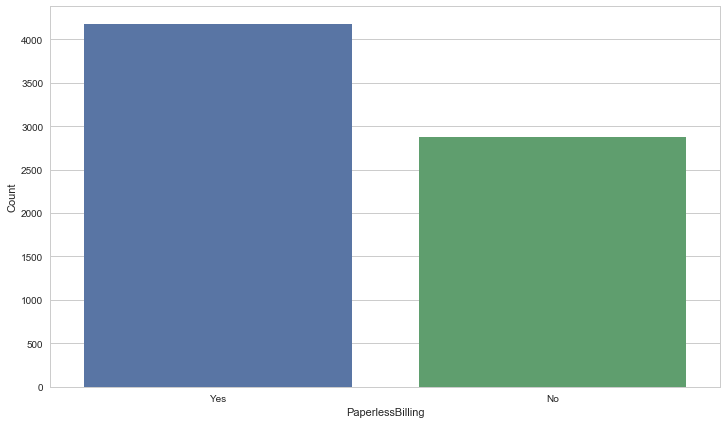

In [25]:
# Show a default plot
plotFeatureCount(w_features.value, w_radio.value)
# Show the widgets
HBox([w_features, w_radio])

## EXERCISE 1

How balanced are the categorical features? Do you anticipate any problems using this dataset to predict if a customer will switch (be subject to churn) or not?

## 6. Visualize Relationships Between Categorical Features

### Does gender make a difference for churn?

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


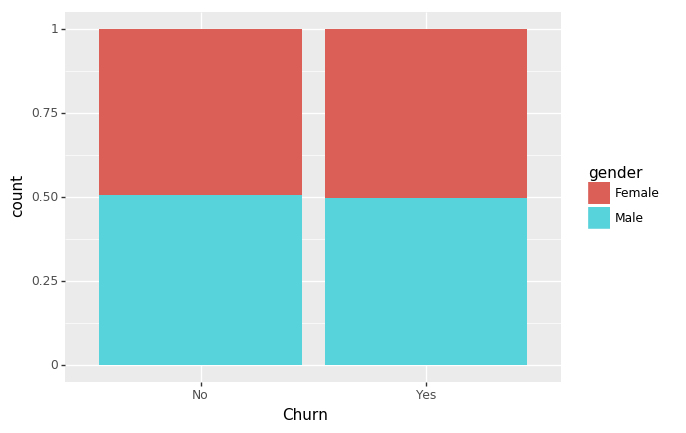

<ggplot: (-9223372036566525489)>

In [26]:
# One way to visualize the effect of gender on churn -- i.e. interdependence between variables
from plotnine import *
(ggplot(df_churn, aes(x='Churn', fill='gender')) + geom_bar(position='fill'))

### Does a factor in addition to gender affect churn?

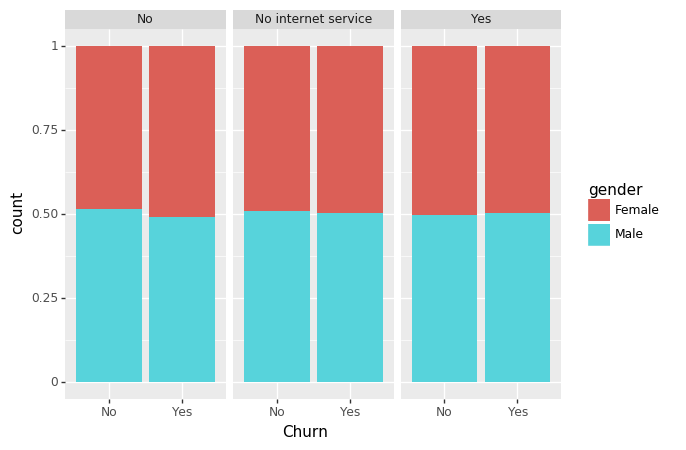

<ggplot: (287957480)>

In [27]:
# Does the streaming movies along with gender affect churn?
from plotnine import *
(ggplot(df_churn, aes(x='Churn', fill='gender')) + geom_bar(position='fill') + facet_wrap('~StreamingMovies'))

## 7. Visualize Relationships Between Numerical and Categorical Attributes

### Does tenure affect churn?

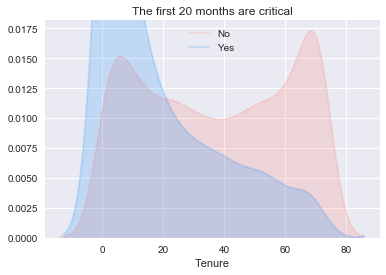

In [28]:
# Density Plot
sns.kdeplot(df_churn.query("Churn == 'No'").tenure, shade=True, alpha=0.2, label='No', color='salmon')
sns.kdeplot(df_churn.query("Churn == 'Yes'").tenure, shade=True, alpha=0.2, label='Yes', color='dodgerblue')
plt.title('The first 20 months are critical')
plt.xlabel('Tenure')

### Does tenure in addition to gender affect churn?

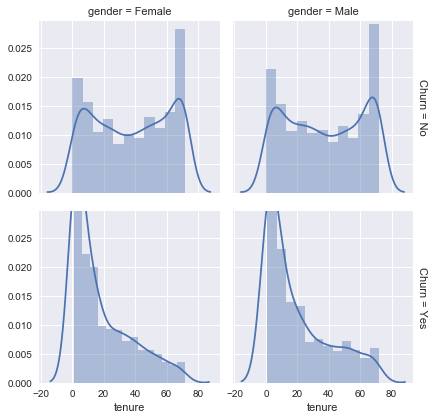

In [29]:
# Facet Plots
g = sns.FacetGrid(df_churn, row='Churn', col='gender', margin_titles=True)
g.map(sns.distplot, 'tenure')

### Do senior citizens pay more per month?

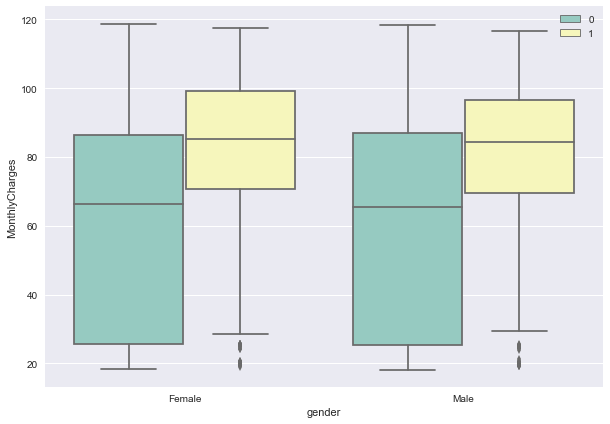

In [30]:
# Pivots
# Do monthly charges depend on gender? They don't seem to; but they do seem to depend on whether 
# or not the person is a senior citizen -- 0 = Not a senior citizen, 1 = senior citizen
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(x='gender', y='MonthlyCharges', hue="SeniorCitizen", data=df_churn, palette='Set3')
plt.legend(loc='upper right')

### Do monthly charges depend on the lenght of the contract?

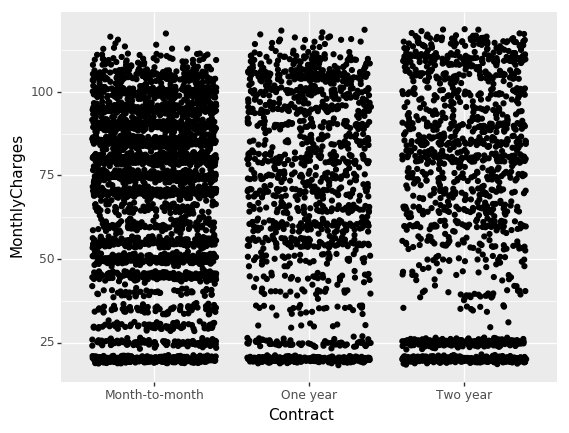

<ggplot: (289716400)>

In [31]:
# Jitter plot
# Do monthly charges depend on the length of contract?
from plotnine import *
(ggplot(df_churn, aes(x='Contract', y='MonthlyCharges')) + geom_jitter(position=position_jitter(0.4)))

### Does having online backup service increase monthly charges?

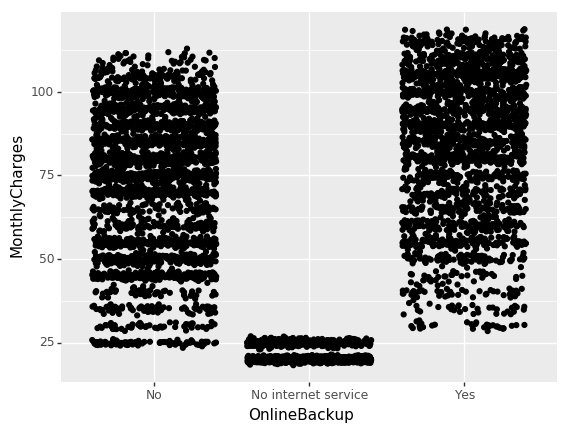

<ggplot: (289063944)>

In [32]:
# Jitter plot
# How does online backup service affect monthly charges?
from plotnine import *
(ggplot(df_churn, aes(x='OnlineBackup', y='MonthlyCharges')) + geom_jitter(position=position_jitter(0.4)))

## 8. Find and Handle Missing Values

In [33]:
# For each column in the dataset, add up the rows in which the column data is missing
# You can do this across the entire dataset for a quick look at what's missing
df_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The zeros mean there are no missing data values. This is very nice, but unusual in most datasets, so we've lucked out. When there are missing values it takes effort and judgement to decide how to handle them. Sometimes it's not clear how to handle missing data even though there are a number of standard techniques to choose from.

One thing to watch out for is a value that seems to be missing, except that it really is an empty string like '' or a string with some spaces such as '   '. These usually trip up the plotting functions and that's one (stressful) way to identify them. 

In [34]:
# For each of the features, find rows where they might be empty -- we'll have to handle these appropriately
def isEmpty(feature):
    empty_rows = []
    for i in range(len(df_churn)):
        if isinstance(df_churn[feature][i], str):
            empty_rows.append(i)
    
    return empty_rows

In [35]:
# Which of the numerical features have no numerical values?
empty = [[feature,isEmpty(feature)] for feature in numeric_features]
empty

[['tenure', []],
 ['MonthlyCharges', []],
 ['TotalCharges',
  [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]]]

In [36]:
# Let's have a look at these rows where one or more numberical features are empty.
df_churn.iloc[empty[2][1]]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


It turns out that TotalCharges are empty when tenure = 0. These rows do have a monthly charge. We'll just make the total charge equal the monthly charge in these cases.

In [37]:
df_churn.iloc[488]['MonthlyCharges']

52.549999999999997

In [38]:
# Get the monthly charges for these rows
monthly_charges = [df_churn.iloc[loc]['MonthlyCharges'] for loc in empty[2][1]]
monthly_charges
#df_churn.set_value(488, 'TotalCharges', 52.555)
#df_churn.iloc[488]

[52.549999999999997,
 20.25,
 80.849999999999994,
 25.75,
 56.049999999999997,
 19.850000000000001,
 25.350000000000001,
 20.0,
 19.699999999999999,
 73.349999999999994,
 61.899999999999999]

In [39]:
# For all customers whose tenure is 0 months, set the TotalCharges equal to the MonthlyCharges
# This is the new dataset
[df_churn.set_value(loc, 'TotalCharges', df_churn.iloc[loc]['MonthlyCharges']) for loc in empty[2][1]]
df_churn.shape

(7043, 21)

In [40]:
# Let's check if the values of TotalCharges are as they should be.
df_churn.iloc[empty[2][1]][['MonthlyCharges','TotalCharges']]

,MonthlyCharges,TotalCharges
488,52.55,52.55
753,20.25,20.25
936,80.85,80.85
1082,25.75,25.75
1340,56.05,56.05
3331,19.85,19.85
3826,25.35,25.35
4380,20.00,20
5218,19.70,19.7
6670,73.35,73.35


## Exercise 2

What other checks on the data would you do to catch weird values appearing in the data?

## Summary

Data exploration and visualization are useful first steps in machine learning because they help give us ideas for how to investigate the data as well as prepare the data so that its suitable for machine learning. Some important activities include:

- Finding and handling missing data
- Identifying skewed features that require appropriate transformation
- Ensuring that the data is representative (which has implications for how should use the data and the kinds of inferences we can plausibly make from it)
- Seeing if features should be combined to improve prediction
- Normalizing or scaling features if feature values range widely (e.g., one features has values in the range 1 to 10 while another feature has values in the range 100,000 to 1,000,000).

To systematicaly explore the dataset, take the following steps:

1. Get the data into manipulable form.
2. Get a handle on the structure of the data.
3. Visualize the numerical features.
4. Visualize the relationships between numerical features.
5. Visualize the categorical features.
6. Visualize the relationships between categorical features.
7. Visualize the relationships between numerical and categorical features.
8. Find and handle missing values.


When there are too many features (columns) in the dataset to apply the methods above, there are other techiques that come into play both for visualization and for analysis. These techniques allow us to rank the importance of features so we can prioritize the ones to scrutinize. We'll get to these techiques when we study feature engineering later in the course.